<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/2_cross_val_score_KNN_for_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mobile Phone Price Tag Prediction**

![alt text](https://images.unsplash.com/photo-1575571536958-38aa1227786a?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80)

We want to start a new mobile phone manufacturing company and we would like to decide the price range of the mobile phone. 

So we have done market studies and collected information of around 2000 mobile phones with 4 levels of price range:

(0 being lowest, 3 being higest price tag)


The dataset contains the information about features of mobile phones and corresponding sales price tag  ( 4 levels).

##**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics


##**Data Exploration**

###**Load the data**

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2


###**Data Visualisation**

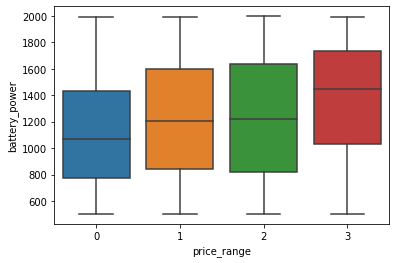

In [ ]:
sn.boxplot(x = 'price_range', y = 'battery_power', data = train);

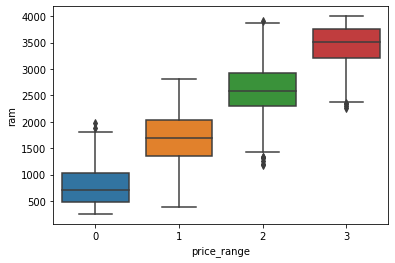

In [ ]:
sn.boxplot(x = 'price_range', y = 'ram', data = train);

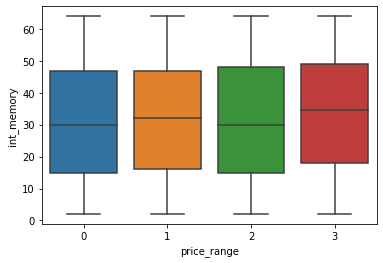

In [ ]:
sn.boxplot(x = 'price_range', y = 'int_memory', data = train);

##**Feature engineering**

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.dtypes

battery_power       int64
blue                int64
clock_speed       float64
dual_sim            int64
fc                  int64
four_g              int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g             int64
touch_screen        int64
wifi                int64
price_range      category
dtype: object

In [ ]:
train.price_range = train.price_range.astype('category')

In [ ]:
test.shape
train.shape

(2000, 21)

##**Modelling**

###**basic KNN model**

In [ ]:
X = train.drop(['price_range'], axis = 1)

In [ ]:
X.shape

(2000, 20)

In [ ]:
y = train['price_range']

In [ ]:
y.shape

(2000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)


In [ ]:
X_test.shape

(400, 20)

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9275

###**Cross validation score**

**X fold cross validation**

1. Split the data into X equal paritions / folds

2. use fold 1 as the test set and the (X-1) folds as train set

3.  Calculate test accuracy

4.  Repeat these steps 2, 3 for X times

5. Use the average of all these X testing accuracies as the estimate of sample accuracy

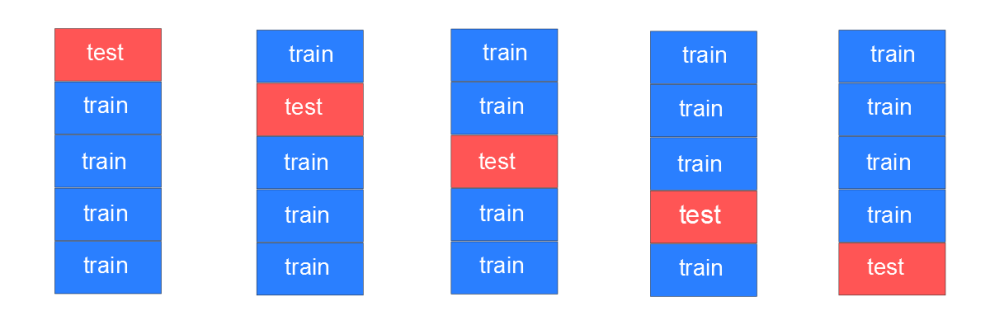

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 5)


In [ ]:
scores = cross_val_score(knn, X, y , cv = 10, scoring= 'accuracy')

In [ ]:
print(scores)

[0.9   0.94  0.92  0.935 0.925 0.95  0.915 0.915 0.915 0.92 ]


In [ ]:
print(scores.mean())

0.9235000000000001


In [ ]:
k_range = range(1, 41)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X, y , cv = 5, scoring= 'accuracy')
  k_scores.append(scores.mean())

In [ ]:
k_scores

[0.908,
 0.8950000000000001,
 0.9195,
 0.9094999999999999,
 0.9195,
 0.9205,
 0.925,
 0.9245000000000001,
 0.931,
 0.9315,
 0.9345000000000001,
 0.93,
 0.9339999999999999,
 0.929,
 0.9299999999999999,
 0.9279999999999999,
 0.9315,
 0.9305,
 0.932,
 0.93,
 0.9295000000000002,
 0.9295000000000002,
 0.9325000000000001,
 0.9280000000000002,
 0.931,
 0.9339999999999999,
 0.933,
 0.9324999999999999,
 0.9305,
 0.9295,
 0.932,
 0.9285,
 0.9280000000000002,
 0.9275,
 0.9289999999999999,
 0.9239999999999998,
 0.9245000000000001,
 0.9244999999999999,
 0.9260000000000002,
 0.9264999999999999]

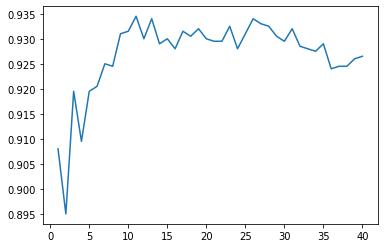

In [ ]:
sn.lineplot(x = k_range, y = k_scores);
